In [75]:
import numpy as np
import pandas as pd
import math
# Voltages assume no other composition impacts the voltage reading other than manufacturer specified
# This model also assumes the voltages have no noise in the readings and that there is no dynamic impact 



# These functions convert a composition into a voltage by taking the resistance to composition lines,
# relating it to a voltage.



def TGS2610C_voltage(comp):
    #comp[0]=ethanol, comp[1]=hydrogen, comp[2]=methane, comp[3]=isobutane, comp[4]=propane
    compeff=np.zeros(5)
    m=[-0.520537, -0.51098066, -0.52160942, -0.58191744, -0.58191744]
    linc=[4.79196019,  4.39143575,  4.06563873,  4.3121193,  4.3121193]
    a=[-0.04651549, -0.03856592, -0.03367033, -0.0381712, -0.0381712]
    b=[0.17582301, 0.06968171,  -0.02132515, -0.01319158,  -0.01319158]
    c=[2.24645285, 2.24668071, 2.24592385, 2.24112029 , 2.24112029]
    poly = np.poly1d([m[0], linc[0]])
    poly2 = np.poly1d([a[0], b[0], c[0]])
    Vrl=0.0809988
    for i in range (0, 5):
        if comp[i]>300:
            compeff[i]=(m[i]*comp[i]+linc[i]-linc[0])/m[0]
        else:
            compeff[i]=abs((math.sqrt(abs(pow(b[0],2)-4.*a[0]*(c[0]-a[i]*pow(comp[i],2)-b[i]*comp[i]-c[i])))-b[0])/(2.*a[0]))
        if compeff[i]<1:
            compeff[i]=0
    compt=np.sum(compeff) 
    if compt<1:
        compt=1
    if  compt>300:
            Vrl=50000/((6466*np.exp(poly(np.log(compt))))+10000)
    else:
            Vrl=50000/((6466*np.exp(poly2(np.log(compt))))+10000)
    if Vrl>=5:
        Vrl=5
    return Vrl


def TGS2610D_voltage(comp):
    #comp[0]=ethanol, comp[1]=hydrogen, comp[2]=methane, comp[3]=isobutane, comp[4]=propane
    compeff=np.zeros(5)
    Vrl=0.14621129
    m=[-0.0780411, -0.36560724, -0.43630751, -0.5005877, -0.52637503]
    linc=[2.79278989,  3.18747072,  3.64038541,  3.73111725, 3.87145149]
    a=[-0.00783943, -0.01550003, -0.02393278, -0.02587157, -0.02820639]
    b=[0.04313954, -0.13332885, -0.07988081, -0.11532545, -0.10505025]
    c=[2.33228852, 2.33334155, 2.33720834, 2.32664566, 2.32967364]
    poly = np.poly1d([m[0], linc[0]])
    poly2 = np.poly1d([a[0], b[0], c[0]])
    for i in range (0, 5):
        if comp[i]>300:
            compeff[i]=(m[i]*comp[i]+linc[i]-linc[0])/m[0]
        else:
            compeff[i]=abs((math.sqrt(abs(pow(b[0],2)-4.*a[0]*(c[0]-a[i]*pow(comp[i],2)-b[i]*comp[i]-c[i])))-b[0])/(2.*a[0]))
        if compeff[i]<1:
            compeff[i]=0
    compt=np.sum(compeff) 
    if compt<1:
        compt=1
    if  compt>300:
        Vrl=50000/((6466*np.exp(poly(np.log(compt))))+10000)
    else:
        Vrl=50000/((6466*np.exp(poly2(np.log(compt))))+10000)
    if Vrl>=5:
        Vrl=5   
    return Vrl

def TGS2611C_voltage(comp):
    #comp[0]=ethanol, comp[1]=hydrogen, comp[2]=methane, comp[3]=isobutane
    compeff=np.zeros(4)
    m=[-0.3711073,-0.35718333,-0.43148312,-0.38669676]
    linc=[3.98629003, 3.6974778, 3.69045858, 3.85023112]
    a=[0.0334765, -0.02779698, -0.02802611, -0.03170528]
    b=[0.13054264, 0.06228454, -0.01054201, 0.08343952]
    c=[2.14195564, 2.14556136, 2.14001655, 2.14147512]
    poly = np.poly1d([m[0], linc[0]])
    poly2 = np.poly1d([a[0], b[0], c[0]])
    Vrl=0.0809988
    for i in range (0, 4):
        if comp[i]>300:
            compeff[i]=(m[i]*comp[i]+linc[i]-linc[0])/m[0]
        else:
            compeff[i]=abs((math.sqrt(abs(pow(b[0],2)-4.*a[0]*(c[0]-a[i]*pow(comp[i],2)-b[i]*comp[i]-c[i])))-b[0])/(2.*a[0]))
        if compeff[i]<1:
            compeff[i]=0
    compt=np.sum(compeff) 
    if compt<1:
        compt=1
    if  compt>300:
        Vrl=50000/((6466*np.exp(poly(np.log(compt))))+10000)
    else:
        Vrl=50000/((6466*np.exp(poly2(np.log(compt))))+10000)
    if Vrl>=5:
        Vrl=5   
    return Vrl

def TGS2611E_voltage(comp):
     #comp[0]=ethanol, comp[1]=hydrogen, comp[2]=methane, comp[3]=isobutane
    compeff=np.zeros(4)
    m=[0,-0.31340759, -0.395091]
    linc=[0,3.25756, 3.39058279]
    a=[0,-0.01990088 ,-0.02178998]
    b=[0,-0.01657128,-0.0666278]
    c=[0, 2.17242723, 2.17093562]
    poly = np.poly1d([m[1], linc[1]])
    poly2 = np.poly1d([a[1], b[1], c[1]])
    for i in range (1, 3):
        if comp[i]>300:
            compeff[i]=(m[i]*comp[i]+linc[i]-linc[1])/m[1]
        else:
            compeff[i]=abs((math.sqrt(abs(pow(b[1],2)-4.*a[1]*(c[1]-a[i]*pow(comp[i],2)-b[i]*comp[i]-c[i])))-b[1])/(2.*a[1]))
        if compeff[i]<1:
            compeff[i]=0
    compt=np.sum(compeff) 
    if compt<1:
        compt=1
    if  compt>300:
        Vrl=50000/((6466*np.exp(poly(np.log(compt))))+10000)
    else:
        Vrl=50000/((6466*np.exp(poly2(np.log(compt))))+10000)
    if Vrl>=5:
        Vrl=5   
    return Vrl
    
def TGS821_voltage(comp):
    # 1,2,3,5
    #comp[0]=ethanol, comp[1]=hydrogen, comp[2]=methane, comp[3]=isobutane, comp[4]=propane, 
    #comp[5]= compco, comp[6]=comph2s, comp[7]= comptol, comp[8]= compamm
    m=[-0.25268139, -0.72410286 , -0.29188387,0,0,-0.61434734]
    linc=[5.2635267, 3.27864955, 5.74540696,0,0, 6.85006096]
    a=[-0.05202049 , -0.03111648, -0.06243998, 0 ,0,-0.0788518]
    b=[0.55140452, -0.37389274, 0.65452653, 0, 0, 0.60331319]
    c=[2.17036367,  2.40809788,  2.17039244,0, 0, 2.17085363]
    complimit=[1000, 10, 1000, 1, 1, 1000]
    poly = np.poly1d([m[1], linc[1]])
    poly2 = np.poly1d([a[1],  b[1],  c[1]])
    compeff=np.zeros(6)
    for i in [0,1,2,5]:
        if comp[i]!=0:
            if comp[i]>complimit[i]:
                compeff[i]=(m[i]*comp[i]+linc[i]-linc[1])/m[1]
                if compeff[i]>complimit[1]:
                    compeff[i]=(a[i]*pow(comp[i],2)+b[i]*comp[i]+c[i]-linc[1])/m[1]
            else:
                compeff[i]=abs((math.sqrt(abs(pow(b[1],2)-4.*a[1]*(c[1]-a[i]*pow(comp[i],2)-b[i]*comp[i]-c[i])))-b[1])/(2.*a[1]))                   
    compt=np.sum(compeff)
    if compt<1:
        compt=1
    if  compt>complimit[1]:
        Vrl=50000/((12000*np.exp(poly(np.log(compt))))+10000)
    else:
        Vrl=50000/((12000*np.exp(poly2(np.log(compt))))+10000)
    if Vrl>=5:
        Vrl=5   
    return Vrl


def TGS2602_voltage(comp):
   # 1 , 2 , 8, 6, 7  
#comp[0]=ethanol, comp[1]=hydrogen, comp[2]=methane, comp[3]=isobutane, comp[4]=propane, 
#comp[5]= compco, comp[6]=comph2s, comp[7]= comptol, comp[8]= compamm
    m=[-0.45174998,-0.45174998, -0.08410579,0,0,0,0,0,0];m[8]=-0.284918; m[6]= -0.34782794; m[7]= -0.59108458
    linc=[-0.20899002,-0.20899002, -0.14035422,0,0,0,0,0,0];linc[8]= -0.12711518; linc[6]= -0.96296; linc[7]= -1.15168577
    a=[-0.02704552, 0.0130067, 0.0130067,0,0,0,0,0,0]; a[8]=-0.04203248; a[6]=-0.12014485; a[7]=0.09512849
    b=[-0.38672464, -0.14484292, -0.144842920,0, 0,0,0,0,0];b[8]=-0.16737745; b[6]=-0.46596887; b[7]=-1.00439805
    c=[-0.18446568, -0.08019489,-0.08019489,0,0,0,0,0,0];c[8]=-0.12985859; c[6]=-0.78432546; c[7]=-0.77120877
    

    compeff=np.zeros(10)
    poly = np.poly1d([m[0], linc[0]])
    poly2 = np.poly1d([a[0], b[0], c[0]])
    for i in [1 , 2 , 8, 6, 7]:
        if comp[i]!=0:
            if comp[i]>300:
                compeff[i]=(m[i]*comp[i]+linc[i]-linc[0])/m[0]
            else:
                compeff[i]=abs((math.sqrt(abs(pow(b[0],2)-4.*a[0]*(c[0]-a[i]*pow(comp[i]),2)-b[i]*comp[i])-c[i])))-b[0])/(2.*a[0]))
        if compeff[i]<1:
            compeff[i]=0
    compt=np.sum(compeff)
    if compt<1:
        compt=1
    if  compt>300:
        Vrl=50000/((90000*np.exp(poly(np.log(compt))))+10000)
    else:
        Vrl=50000/((90000*np.exp(poly2(np.log(compt))))+10000)
    if Vrl>=5:
        Vrl=5   
    return Vrl


def TGS2620_voltage(comp):
    # 0 , 1, 2, 3, 5 
#comp[0]=ethanol, comp[1]=hydrogen, comp[2]=methane, comp[3]=isobutane, comp[4]=propane, 
#comp[5]= compco, comp[6]=comph2s, comp[7]= comptol, comp[8]= compamm
    m=[-0.63663885,-0.51568026,-0.41100547,-0.53475486, 0, -0.54209517]
    linc=[3.6739128,2.99570642,  4.37689757,  3.3718626, 0 ,  3.9131767]
    a=[-0.01461021 , 2.99179660e-03, -3.19579850e-02,-0.01943419, 0, -1.86217039e-03]
    b=[-0.44820748, -5.47777751e-01, 2.08310406e-03, -0.28624749, 0, -4.88432138e-01]
    c=[3.09488812, 3.07273115e+00, 3.10892742e+00, 3.11247261, 0, 3.15151877e+00]
    
    poly = np.poly1d([m[0], linc[0]])
    poly2 = np.poly1d([a[0], b[0], c[0]])
    compeff=np.zeros(10)
    for i in [0, 1, 2, 3, 5]:
        if comp[i]!=0:
            if comp[i]>50:
                compeff[i]=(m[i]*comp[i]+linc[i]-linc[0])/m[0]
            else:
                compeff[i]=abs((math.sqrt(abs(pow(b[0],2)-4.*a[0]*(c[0]-a[i]*pow(comp[i],2)-b[i]*comp[i]-c[i])))-b[0])/(2.*a[0]))
        if compeff[i]<1:
            compeff[i]=0
    compt=np.sum(compeff) 
    if compt<1:
        compt=1
    if  compt>50:
        Vrl=50000/((15000*np.exp(poly(np.log(compt))))+10000)
    else:
        Vrl=50000/((15000*np.exp(poly2(np.log(compt))))+10000)
    if Vrl>=5:
        Vrl=5   
    return Vrl


# Voltage_Virtual_Nose sends the compositions to each individual MOS and checks for a composition exceeding 1,000,000ppmV

def Voltage_Virtual_Nose(comp):
    
    comp_total= comp[0]+ comp[1]+ comp[2]+comp[3]+comp[4]+ comp[5]+comp[6]+comp[7] + comp[8]+  comp[9]
    if comp_total> 1000001:
        print("error: comp greater than 1000000 ppm")
        return 
    VT=np.array([0.,0.,0.,0.,0.,0.,0.])
    VT[0]= round(TGS2610C_voltage(comp), 3)
    VT[1]= round(TGS2610D_voltage(comp), 3)
    VT[2]= round(TGS2611C_voltage(comp) , 3)
    VT[3]= round(TGS2611E_voltage(comp), 3)
    VT[4]= round(TGS821_voltage(comp), 3)
    VT[5]= round(TGS2602_voltage(comp), 3)
    VT[6]= round(TGS2620_voltage(comp), 3)
    return VT
# competh=1; comphyd=10; compmet=1; compibut=1; compprop=10000; compair=1000000;
# compco=1; comph2s=100; comptol=100; compamm=100


In [ ]:
#test case 1, 0 compositions, should reply with base air value 
print("         Test 1: 0 compositions ")
print("")
comp=[0, 0, 0, 0, 0, 0, 0,0, 0, 0]
V=Voltage_Virtual_Nose(comp)
print(V)
print("")
print("check does V = [0.703 0.653 0.768 0.749 0.349  0.589 0.147]")
print("")
#test case 2, composition exceeds 1000000 ppm 
print("         Test 2:  composition exceeds 1000000 ppm ")
print("")
comp=[0, 0, 0, 0, 0,0, 0,0, 0, 2000000]
V=Voltage_Virtual_Nose(comp)
print("")
#test case 3, check for changes V =  [1.553 2.731 0.398 0.469 2.061 2.341 2.587]
print("         Test 3: check for unexpected changes")
print("")
comp=[10, 40, 30, 50, 6000,7000, 80, 50, 300, 10000]
V=Voltage_Virtual_Nose(comp)
print(V)
print("")
print("check does V = [2.797 0.891 0.22  1.074 4.998 3.63 4.073]")

In [ ]:
# builds a database of Comp and Vout from the Virtual Nose. Set as: 0% - 20% for each component.


k=0
T={} 
for i in range (0, 10):
    comp=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1000000])  
    while comp[i]<=19999:
        comp[i]=comp[i]+1
        comp[9]=comp[9]-1
        V=Voltage_Virtual_Nose(comp)
        T.update({k:[[i for i in comp],V]})
        k=k+1
        


In [ ]:
#Creates a linear Response Model

CoLinear=np.zeros([180000,10,7])
Rs=np.zeros([180000, 7])

for k in range(0, 179999):
    for j in range (0, 7):
        Rs[k][j]=np.log(abs(50000/T[k][1][j]-10000))
        

for k in range(0, 179999):
    for j in range (0, 7):
        for i in range(0, 10):
            if T[k][1][j]!=T[k+1][1][j]:
                if T[k][0][i]!=T[k+1][0][i]:
                    
                    CoLinear[k,i,j]=(T[k+1][0][i]-T[k][0][i])/(Rs[k+1][j]-Rs[k][j])
                
AverageK=np.zeros([7,10])
for j in range (0, 7):
        for i in range(0, 10):
            count=0
            TotalK=0
            for k in range(0, 179999):
                if CoLinear[k][i,j]!=0:
                    count=count+1
                    TotalK=TotalK + CoLinear[k][i,j]
            if count!=0:
                AverageK[j,i]=TotalK/count
            else:
                AverageK[j,i]=0         

Vcomptest=[0, 0, 0, 0, 0, 0, 0, 0, 0, 900000]
V=Voltage_Virtual_Nose(Vcomptest)
Caver=np.dot(V, AverageK)
Vp=Voltage_Virtual_Nose(Caver)
print(V)
print(Vp)
print(Caver)

In [ ]:
comp=[0, 0, 0, 0, 0, 0, 0, 0, 0, 900000]
V0=Voltage_Virtual_Nose(comp)
comp=[0, 0, 0, 0, 10000, 0, 0, 0, 0, 900000]
V=Voltage_Virtual_Nose(comp)
Caver=np.dot(V, AverageK)
#-2.18*np.dot(V0, AverageK)
Vp=Voltage_Virtual_Nose(Caver)
print(V)
print(Vp)


In [ ]:
import matplotlib.pyplot as plt

a=[-0.02704552, -0.02704552, 0.0130067,0,0,0,0,0,0]; a[8]=-0.04203248; a[6]=-0.12014485; a[7]=0.09512849
b=[-0.38672464, -0.38672464, -0.144842920,0, 0,0,0,0,0];b[8]=-0.16737745; b[6]=-0.46596887; b[7]=-1.00439805
c=[-0.18446568, -0.18446568,-0.08019489, 0, 0,0,0,0,0];c[8]=-0.12985859; c[6]=-0.78432546; c[7]=-0.77120877
poly2 = np.poly1d([a[0], b[0], c[0]])

x=np.linspace(0,100, 2000)
y=np.zeros(len(x)) 
for i in range(0, len(x)):
    y[i]=poly2(x[i])

plt.plot(x, y)


In [94]:
import matplotlib.pyplot as plt
import numpy as np
import math

def TGS2610C_voltage(comp):
    #comp[0]=ethanol, comp[1]=hydrogen, comp[2]=methane, comp[3]=isobutane, comp[4]=propane
    compeff=np.zeros(5)
    m=[-0.520537, -0.51098066, -0.52160942, -0.58191744, -0.58191744]
    linc=[4.79196019,  4.39143575,  4.06563873,  4.3121193,  4.3121193]
    a=[-0.04651549, -0.03856592, -0.03367033, -0.0381712, -0.0381712]
    b=[0.17582301, 0.06968171,  -0.02132515, -0.01319158,  -0.01319158]
    c=[2.24645285, 2.24668071, 2.24592385, 2.24112029 , 2.24112029]
    poly = np.poly1d([m[0], linc[0]])
    poly2 = np.poly1d([a[0], b[0], c[0]])
    Vrl=0.0809988
    for i in range (0, 5):
        if comp[i]!=0:
            if comp[i]>300:
                compeff[i]=(m[i]*np.log(comp[i])+linc[i]-linc[0])/m[0]
            else:
                compeff[i]=(math.sqrt(abs(pow(b[0],2)-4.*a[0]*(c[0]-a[i]*pow(np.log(comp[i]),2)-b[i]*np.log(comp[i])-c[i])))-b[0])/(2.*a[0])

    compt=np.sum(abs(compeff)) 
    if  compt>300:
            Vrl=50000/(6466*np.exp(poly(np.log(compt)))+10000)
    else:
            Vrl=50000/(6466*np.exp(poly2(np.log(compt)))+10000)
    if Vrl>=5:
        Vrl=5
    return Vrl
        
#for i in range (0, 5):
T={}
k=0
comp=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1000000])  
for i in range (0, 5):
    while comp[i]<=19999:
        comp[i]=comp[i]+1
        comp[9]=comp[9]-1
        V=TGS2610C_voltage(comp)
        T.update({k:[[i for i in comp],V]})
        k=k+1
        

#for i in range(0, 5):
#plt.plot(T[:][1], V)

C:\Users\RyanB\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log
C:\Users\RyanB\anaconda3\lib\site-packages\numpy\lib\polynomial.py:736: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


KeyError: 100000

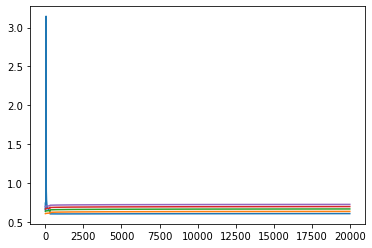

In [97]:
x=np.zeros([20000, 6])
y=np.zeros([20000, 6])
#for i in range(0, 5):
nstep=0
for j in range(0,6): 
    for k in range(0+nstep,nstep+20000):
        x[k-nstep][j]=T[k][0][j]
        y[k-nstep][j]=T[k][1]
    nstep=nstep+20000
    plt.plot(x[:, j], y[:, j])

In [24]:
print(T[][0][0], y)

SyntaxError: invalid syntax (<ipython-input-24-8dd1812f3877>, line 1)

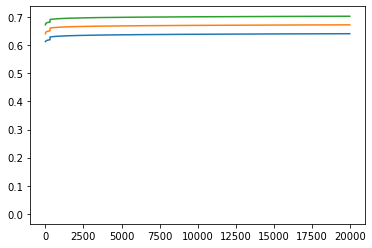

In [98]:

plt.plot(xhyd, yhyd)
plt.plot(xmet, ymet)
plt.plot(xib, yib)
plt.plot(xp, yp)

In [34]:
print(k)

100000


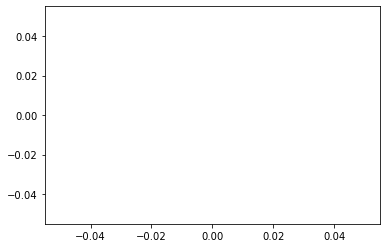

In [99]:
plt.plot(xp, yp)

In [63]:
a=[-0.04651549, -0.03856592, -0.03367033, -0.0381712, -0.0381712]
b=[0.17582301, 0.06968171,  -0.02132515, -0.01319158,  -0.01319158]
c=[2.24645285, 2.24668071, 2.24592385, 2.24112029 , 2.24112029]

compeff=abs((math.sqrt(abs(pow(b[0],2)-4.*a[0]*(c[0]-a[1]*pow(0,2)-b[1]*0-c[1])))-b[0])/(2.*a[0]))
print(compeff)

0.0012964069790293437


In [65]:
a=[-0.04651549, -0.03856592, -0.03367033, -0.0381712, -0.0381712]
b=[0.17582301, 0.06968171,  -0.02132515, -0.01319158,  -0.01319158]
c=[2.24645285, 2.24668071, 2.24592385, 2.24112029 , 2.24112029]
poly2=np.poly1d(a[0], b[0], c[0])

Vrl=50000/(6466*np.exp(poly2(np.log(0.0012964069790293437)))+10000)
print(poly2)

TypeError: dispatcher for __array_function__ did not return an iterable

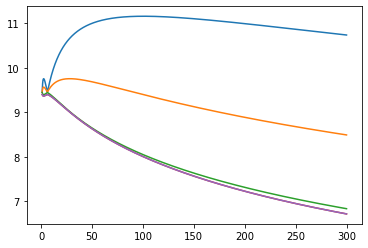

In [79]:
a=[-0.04651549, -0.03856592, -0.03367033, -0.0381712, -0.0381712]
b=[0.17582301, 0.06968171,  -0.02132515, -0.01319158,  -0.01319158]
c=[2.24645285, 2.24668071, 2.24592385, 2.24112029 , 2.24112029]

x=np.linspace(1,300, 2000)
y=np.zeros([len(x), 6]) 
for j in range(0,5):
    poly2 = np.poly1d([a[j], b[j], c[j]])
    for i in range(0, len(x)):
        y[i][j]=np.exp(poly2(abs((math.sqrt(abs(pow(b[0],2)-4.*a[0]*(c[0]-a[1]*pow(np.log(x[i]),2)-b[1]*np.log(x[i])-c[1])))-b[0])/(2.*a[0]))))
    plt.plot(x, y[:,j])